In [1]:
import pandas as pd
import numpy as np


In [2]:

df = pd.read_csv("data/full_dataset_mpv.csv").reset_index(drop = True)

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_24772/2752494498.py:1: DtypeWarning: Columns (4,12,27,30,31,38,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/full_dataset_mpv.csv").reset_index(drop = True)


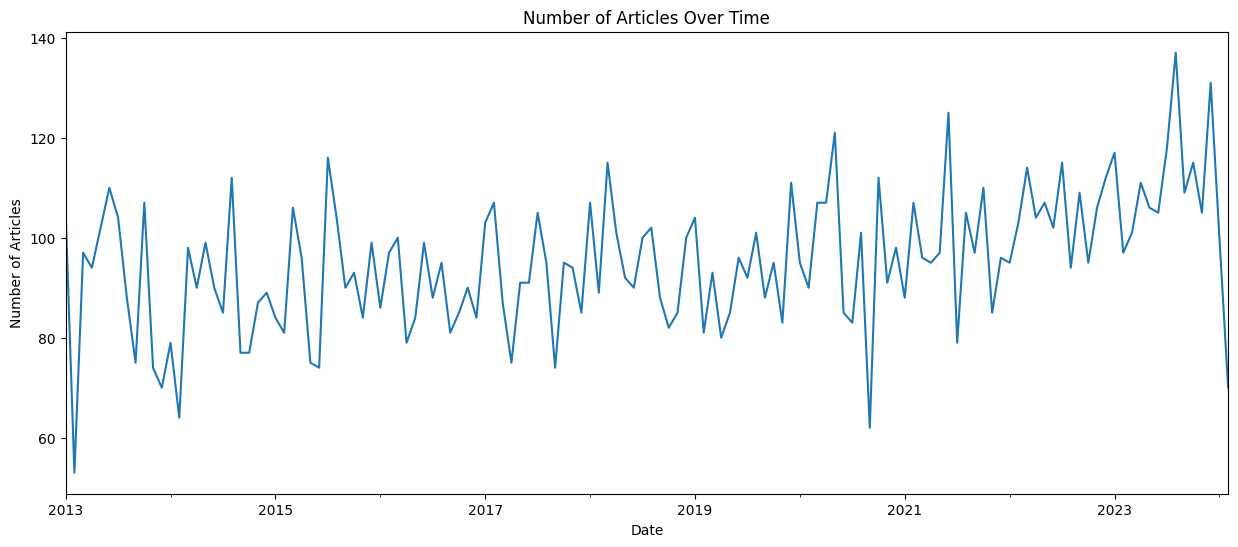

In [3]:
import matplotlib.pyplot as plt 

df.date = pd.to_datetime(df.date)

monthly_articles = df.resample('ME', on='date').size()

plt.figure(figsize=(15, 6))
monthly_articles.plot(title='Number of Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [4]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [5]:

threshold_date = pd.Timestamp('5/25/2020')
a = df.date > threshold_date
# we get the number of articles after the 
print(f"There are {a.sum()} articles produced after George Floyd's protests")
df['after_Floyd'] = a

There are 4621 articles produced after George Floyd's protests


In [6]:
df_selected = df[['name', 'gender','race','age', 'date','after_Floyd', 'city','state', 'county', 'agency_responsible', 'cause_of_death', 'circumstances',
                  'news_urls', 'signs_of_mental_illness','officer_charged', 'allegedly_armed', 'wapo_armed', 'wapo_threat_level', 'wapo_flee',
                  'wapo_body_camera', 'initial_reason','text', 'authors']]

In [7]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12768 entries, 0 to 12767
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     12768 non-null  object        
 1   gender                   12760 non-null  object        
 2   race                     12547 non-null  object        
 3   age                      7836 non-null   object        
 4   date                     12768 non-null  datetime64[ns]
 5   after_Floyd              12768 non-null  bool          
 6   city                     12759 non-null  object        
 7   state                    12768 non-null  object        
 8   county                   12758 non-null  object        
 9   agency_responsible       12745 non-null  object        
 10  cause_of_death           12760 non-null  object        
 11  circumstances            12741 non-null  object        
 12  news_urls                12766 n

In [8]:
df_selected.text.describe()


count     12765
unique     8526
top          []
freq       3321
Name: text, dtype: object

In [9]:
df_selected = df_selected[df_selected.text != '[]']
df_selected = df_selected[df_selected.text != "[['']]"]
df_selected = df_selected[df_selected.text != "['']"]
df_selected = df_selected[df_selected.text != "nan"]
df_selected.reset_index(inplace=True, drop=True)

In [10]:
df_selected.text[df_selected.text.isna()].unique()

array([nan], dtype=object)

In [11]:
df_selected.dropna(subset= 'text',inplace = True)

In [12]:
import ast
df_selected.text = df_selected.text.apply(ast.literal_eval)
df_selected = df_selected.explode('text')
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16730 entries, 0 to 9204
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     16730 non-null  object        
 1   gender                   16716 non-null  object        
 2   race                     16172 non-null  object        
 3   age                      12888 non-null  object        
 4   date                     16730 non-null  datetime64[ns]
 5   after_Floyd              16730 non-null  bool          
 6   city                     16723 non-null  object        
 7   state                    16730 non-null  object        
 8   county                   16705 non-null  object        
 9   agency_responsible       16695 non-null  object        
 10  cause_of_death           16707 non-null  object        
 11  circumstances            16702 non-null  object        
 12  news_urls                16730 non-nul

In [13]:
df_selected.reset_index(inplace = True, drop = True)

In [14]:
df_selected['text'] = df_selected['text'].apply(str)

df_selected['text'].head()

0    ['A Godfrey man who had been charged with murd...
1    ['The man, identified as Clyde Young, was char...
2    ['DESOTO COUNTY, Miss. (WMC) - Mississippi Bur...
3    ['Close Get email notifications on {{subject}}...
4    ['The Carlos Moore Law Group said it has been ...
Name: text, dtype: object

In [15]:
df_selected['TextColumn'] = df_selected['text'].str.replace(r'\\n\\n', ' ', regex=True)
df_selected['TextColumn'] = df_selected['TextColumn'].str.replace(r'[^a-zA-Z0-9\s]', ' ', regex=True)
df_selected['TextColumn'] = df_selected['TextColumn'].str.lower() 

df_selected['TextColumn'] = df_selected['TextColumn'].str.replace(r'[0-9]', 'XXX', regex=True)



In [16]:
df_selected['TextColumn'][0]


'  a godfrey man who had been charged with murder in the shooting death of a woman inside a truck in missouri died thursday during a standoff with police in west alton  missouri  amy lynn delacruz  XXXXXX  of cadet  missouri  was identified as the victim found in the truck  according to cpl  barry bayles of the st  charles county  missouri  police department  her body was found early thursday in a tractor trailer in floristell  missouri  according to court records  clyde e  young  XXXXXX  of godfrey  died during a standoff with police at a gas station on u s  XXXXXX in west alton  missouri  near the clark bridge over the mississippi river  police said  bayles said investigators were trying to determine whether young was shot by police or if he died from a self inflicted gunshot  young had called XXXXXXXXX to say his girlfriend was shot in the truck in floristell  according to a probable cause statement filed in st  charles county court by the st  charles police department  young was no

# Now we start the check of all other columns

In [17]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     16730 non-null  object        
 1   gender                   16716 non-null  object        
 2   race                     16172 non-null  object        
 3   age                      12888 non-null  object        
 4   date                     16730 non-null  datetime64[ns]
 5   after_Floyd              16730 non-null  bool          
 6   city                     16723 non-null  object        
 7   state                    16730 non-null  object        
 8   county                   16705 non-null  object        
 9   agency_responsible       16695 non-null  object        
 10  cause_of_death           16707 non-null  object        
 11  circumstances            16702 non-null  object        
 12  news_urls                16730 n

we start from gender

In [18]:
df_selected.loc[df_selected.gender.isna(), 'gender'] = 'Unknown'

In [19]:
df_selected.gender.value_counts()

gender
Male                15553
Female               1111
Unknown                36
Non-Binary             13
Transgender            12
Transgender Male        5
Name: count, dtype: int64

then we move to race

In [20]:
df_selected.race.value_counts()

race
White                                   6616
Black                                   4630
Hispanic                                2702
Unknown race                            1691
Asian                                    246
Native American                          181
Native Hawaiian and Pacific Islander     106
Name: count, dtype: int64

In [21]:
df_selected.loc[df_selected.race.isna(), 'race'] = 'Unknown race'

In [22]:
df_selected.race.value_counts()

race
White                                   6616
Black                                   4630
Hispanic                                2702
Unknown race                            2249
Asian                                    246
Native American                          181
Native Hawaiian and Pacific Islander     106
Name: count, dtype: int64

for age we can't do nothing. Either we drop null values or we don't use age.

For city, county and state, it is enough to keep one and State is the most represented (no nulls)

In [23]:
df_selected.drop(columns = ['county'], inplace= True)
df_selected.dropna(subset = 'city', inplace = True)

then we examine the cause of death

In [24]:
df_selected.cause_of_death.value_counts()[:15]

cause_of_death
Gunshot                         14684
Vehicle                           766
Taser                             311
Gunshot,Taser                     309
Physical Restraint                 95
Unclear                            59
Taser,Physical Restraint           56
Beaten                             36
Other                              35
blunt force trauma/car crash       23
Taser,Beaten                       18
Gunshot,Vehicle                    18
Gunshot,Taser,Bean bag             16
Physical Restraint,Beaten          15
Asphyxiated                        14
Name: count, dtype: int64

In [25]:
df_selected.cause_of_death.isna().sum()

23

In [26]:
df_selected.text[df_selected.cause_of_death.isna()]

2613     ["A family is seeking answers after FBI agents...
2614     ['1 killed in FBI-involved shooting; neighbor ...
2615     ['The family of a disabled veteran that FBI ag...
2616     ["The Henderson Police Department (HPD) provid...
4837     ['It looks like you are not a member of VIP Cl...
4838                                                  ['']
4839     ['BRANSON, Mo. (KY3) - The Branson Police Depa...
4840     ['Branson Police identified the man shot and k...
4841     ['(KTTS News) — Branson Police will give an up...
8107     ['Get Breaking News\n\nSign up now to get our ...
8108     ['Apr. 6—UPDATE: 3:30 P.M.\n\nThe suspect in a...
8109     ['Get Breaking News\n\nSign up now to get our ...
8193     ['MOOREFIELD, W.Va. — A man is dead and a Gran...
8194     ['BRIDGEPORT, W.Va (WDTV) - The West Virginia ...
8195     ['HARDY COUNTY, W.Va. (WHSV) - Grant County Sh...
8396     ["Neighbors of the man who died after a stando...
8567     ['3 MPD officers suspended following in-custod.

In [27]:
df_selected.loc[683, 'cause_of_death'] = 'Gunshot' #text says that "he was shot"
df_selected.loc[1290, 'cause_of_death'] = 'Gunshot' #text says "a man shot by officers"
df_selected.loc[2520, 'cause_of_death'] = 'Gunshot' #text says "police pursed him and shot him."
df_selected.loc[2594, 'cause_of_death'] = 'Gunshot' #text says "A man has died after being shot by police"


df_selected.loc[df_selected.cause_of_death.isna(), 'cause_of_death'] = 'Unclear' #text says that "he was shot"

Now we can analyse  agency_responsible

In [28]:
df_selected.agency_responsible.value_counts()

agency_responsible
Los Angeles Police Department                                         252
New York Police Department                                            211
Phoenix Police Department                                             200
Los Angeles County Sheriff's Department                               182
Houston Police Department                                             139
                                                                     ... 
St. Helena Parish Sheriff's Office                                      1
Georgetown County Sheriff's Office                                      1
Washita County Sheriff's Office                                         1
"Randolph County Sheriff's Department, Lynn Town Marshal's Office"      1
Belding Police Department                                               1
Name: count, Length: 3327, dtype: int64

given we already have the state and the city, we can drop this column

In [29]:
df_selected.drop(labels = 'agency_responsible', inplace=True, axis = 1)

what about the circumstances?

In [30]:
df_selected.circumstances.value_counts()

circumstances
Police attempted to initiate a traffic stop claiming the vehicle was driving recklessly. The victim allegedly fled in the vehicle. Police deployed a tire deflation device to disable the vehicle, causing the vehicle to crash. The victim died from injuries sustained in the crash.                                                                                                                                           26
An active officer traveled to a home in another state to meet an underaged person he had groomed online. Upon arrival at the home he killed the victim and two other relatives of the underaged target before abducting her in his car.                                                                                                                                                                                          17
The victim called the police after a car crash. After an alleged dispute the officer attempted to arrest him. There was an alleged struggle and th

we can keep the variable for further analysis

In [31]:
df_selected.dropna(subset='circumstances', inplace=True)

let's have a look at one of the most crucial variables for our analysis: mental illness

In [32]:
df_selected.signs_of_mental_illness.isna().sum()

977

In [33]:
df_selected.dropna(subset='signs_of_mental_illness', inplace=True)

In [34]:
df_selected.officer_charged.value_counts()

officer_charged
No Known Charges                                                             9199
Charged with a crime                                                           80
"Charged, Charges Dropped"                                                     61
Officer deceased                                                               45
charged with manslaughter                                                      38
                                                                             ... 
No Known Charges,Award Given to Officer                                         1
"Charged, Convicted, Sentenced to 1 year in prison and 4 years probation"       1
"Charged, Plead Guilty to Voluntary Manslaughter"                               1
"charged, convicted, sentenced, vehicular homicide"                             1
"Charged, Convicted, Sentenced to 18 months"                                    1
Name: count, Length: 155, dtype: int64

In [35]:
df_selected.officer_charged.isna().sum()

5543

as for officer charged, despite being interesting, we can't remove so many rows to keep this info which is not determinant for our analysis. Still, we can keep the column to extract some insights on the racial bias. Maybe those killing black people were not charged?

In [36]:
df_selected.allegedly_armed.value_counts()

allegedly_armed
Allegedly Armed                       11011
Unarmed/Did Not Have Actual Weapon     3021
Unclear                                 926
Vehicle                                 726
Name: count, dtype: int64

In [37]:
df_selected.allegedly_armed.isna().sum()

34

In [38]:
df_selected.dropna(subset='allegedly_armed', inplace=True)

To conclude, we don't care about the wapo variables which won't be used in any model but rather used afterwards for further analysis where possible. Still we are lwft with the initial reason

In [39]:
df_selected.initial_reason.value_counts()

initial_reason
Traffic Stop                                                                        837
Domestic Disturbance                                                                743
Warrant                                                                             506
Shooting                                                                            431
Shots fired                                                                         427
                                                                                   ... 
jumped on vehicle                                                                     1
traffic disruption - vehicle against interstate meridian                              1
suspicious individual - spotted with a gun                                            1
mental illness - became combative while police were transporting him to hospital      1
report of a murder                                                                    1
Name: count, Leng

In [40]:
df_selected.initial_reason.isna().sum()

313

In [41]:
df_selected.dropna(subset='initial_reason', inplace=True)

In [42]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15371 entries, 0 to 16729
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     15371 non-null  object        
 1   gender                   15371 non-null  object        
 2   race                     15371 non-null  object        
 3   age                      11678 non-null  object        
 4   date                     15371 non-null  datetime64[ns]
 5   after_Floyd              15371 non-null  bool          
 6   city                     15371 non-null  object        
 7   state                    15371 non-null  object        
 8   cause_of_death           15371 non-null  object        
 9   circumstances            15371 non-null  object        
 10  news_urls                15371 non-null  object        
 11  signs_of_mental_illness  15371 non-null  object        
 12  officer_charged          9985 non-nul

In [43]:
df_selected.text.value_counts()

text
['']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [44]:
df_selected['TextColumn'] = df_selected['TextColumn'].astype(str)
df_selected['text'] = df_selected['text'].astype(str)

In [45]:
# Export the DataFrame to a CSV file
df_selected.to_csv('data/preprocessed_data_mpv.csv', index=False)